# Data Acquisition, Exploration and Preprocessing

### 1. Download and Read the Car Evaluation Dataset from UCI

We first download the Car Evaluation dataset (and the names of attributes) directly from the UCI repository. Then pandas module is used to read the data.


In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlretrieve

# get the Car Evaluation dataset directly from the UCI
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
urlretrieve(dataset_url, 'car.data')

# get the file of names of the attributes from the ad.names
attribute_name_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.c45-names'
urlretrieve(attribute_name_url, 'car.c45-names')

# a list to store the names of attributes
names = []
f = open('car.c45-names', 'r', encoding='unicode_escape')
line = f.readline()
# read each line of the name file
while line:
    # if the line is with colon(:)
    if ': ' in line:
        # split it by colon，and append the first part to the "names" list
        names.append(line.split(': ')[0])
    line = f.readline()
f.close()
# add 'class'(y) which is not included in the ad.names
names.append('class')

# read the dataset with the downloaded file and the names
data = pd.read_csv('car.data', names=names)


### 2. Explain the Dataset

By running the code below, we' ve got an overview of the dataset.
The dataset consists of <b>1728</b> car evaluation samples, each with the following <b>categorical</b> attributes and characteristics:

- <b>buying (buying price)</b>: vhigh, high, med, low.

- <b>maint (maint price)</b>: vhigh, high, med, low.

- <b>doors (number of doors)</b>: 2, 3, 4, 5more.

- <b>persons (number of people to carry)</b>: 2, 4, more.

- <b>lug_boot (size of the luggage boot)</b>: small, med, big.

- <b>safety (estimated safty level)</b>: low, med, high.

The last attribute (class) is the target attribute which shows the overall evaluation of a car. It has four characteristics:

- <b>unacc</b> (Unacceptable)

- <b>acc</b> (Acceptable)

- <b>good</b> (Good)

- <b>vgood</b> (Very Good)


In [2]:
print('Number of samples:', len(data), '\n')

# print the attributes and the characteristics of the dataset
for i in range(len(data.columns)):
    print('Attribute', i+1, ':', data.columns[i])
    if i != len(data.columns)-1:
        print('Characteristics:', data[data.columns[i]].unique(), '\n')
    else:
        print('Characteristics:', data[data.columns[i]].unique())


Number of samples: 1728 

Attribute 1 : buying
Characteristics: ['vhigh' 'high' 'med' 'low'] 

Attribute 2 : maint
Characteristics: ['vhigh' 'high' 'med' 'low'] 

Attribute 3 : doors
Characteristics: ['2' '3' '4' '5more'] 

Attribute 4 : persons
Characteristics: ['2' '4' 'more'] 

Attribute 5 : lug_boot
Characteristics: ['small' 'med' 'big'] 

Attribute 6 : safety
Characteristics: ['low' 'med' 'high'] 

Attribute 7 : class
Characteristics: ['unacc' 'acc' 'vgood' 'good']


By using the .isnull().sum() on the data, we can see that there is no missing value in this dataset.


In [3]:
# print the number of null values in each attribute
print(data.isnull().sum())


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


By plotting a table and a pie chart which shows the distribution of the samples in each class, we can see that the dataset is highly imbalanced -- more than 70% of the samples are Unacceptable ones, while Good and Very Good samples occupy only less than 4% respectively.


| Class | N    | N(%)   |
| ----- | ---- | ------ |
| unacc | 1210 | 70.023 |
| acc   | 384  | 22.222 |
| good  | 69   | 3.993  |
| vgood | 65   | 3.762  |


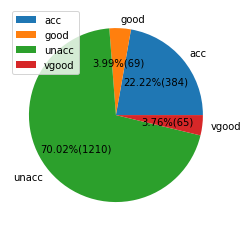

In [4]:
import matplotlib.pyplot as plt

# get a dictionary which contains the number of samples in each class
distribution = data['class'].value_counts()

# draw a pie chart for the data distribution
# get the labels from the dictionary distribution
labels = list(sorted(distribution.keys()))

# get the number of samples in each class
numofclass = []
for label in labels:
    numofclass.append(distribution.get(label))

# a function to return the value and the proportion


def propotion_with_value(values):
    a = str(np.round(values, 2)) + \
        '%('+str(int(np.round(values/100.*sum(numofclass))))+')'
    return a


# plot a pie chart
plt.pie(x=numofclass, labels=labels, autopct=propotion_with_value)
plt.legend()
plt.show()


Similarly, we also tried to explore the distribution of characteristics of each attribute. By plotting a bar graph for each attribute, we can see that each attribute conforms to a uniform distribution.

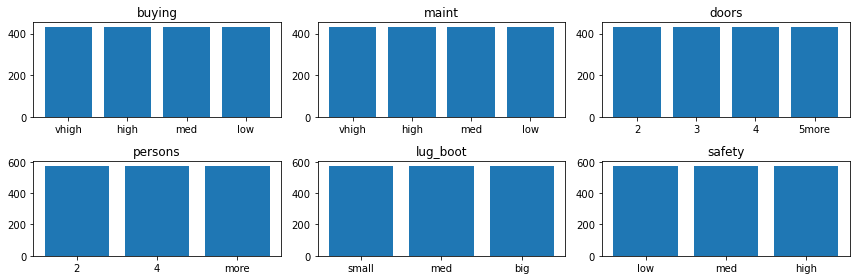

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

ax1 = axes[0, 0]
buying = pd.crosstab(index=data["buying"], columns="count")
ax1.bar(x=data[data.columns[0]].unique(), height=buying['count'])
ax1.set_title('buying')

ax2 = axes[0, 1]
maint = pd.crosstab(index=data["maint"], columns="count")
ax2.bar(x=data[data.columns[1]].unique(), height=maint['count'])
ax2.set_title('maint')

ax3 = axes[0, 2]
doors = pd.crosstab(index=data["doors"], columns="count")
ax3.bar(x=data[data.columns[2]].unique(), height=doors['count'])
ax3.set_title('doors')

ax4 = axes[1, 0]
persons = pd.crosstab(index=data["persons"], columns="count")
ax4.bar(x=data[data.columns[3]].unique(), height=persons['count'])
ax4.set_title('persons')

ax5 = axes[1, 1]
lug_boot = pd.crosstab(index=data["lug_boot"], columns="count")
ax5.bar(x=data[data.columns[4]].unique(), height=lug_boot['count'])
ax5.set_title('lug_boot')

ax6 = axes[1, 2]
safety = pd.crosstab(index=data["safety"], columns="count")
ax6.bar(x=data[data.columns[5]].unique(), height=safety['count'])
ax6.set_title('safety')

plt.tight_layout()
plt.show()


### 3. Convert the Attributes

The attributes of the dataset are labeled in string format. However, some machine learning models require the variables to be coded with integer codes. So, we convert the string categorical values into integer codes using factorize() method of the pandas module.

To check the correspondence in the future, we save the string categorical values and the corresponding integer codes into two dictionaries <b>att_dic</b> and <b>class_dic</b>.


<b>N.B. For models that can be trained with string attributes directly such as Decision Trees, since the original characteristics are ordered sequentially (e.g., [vhigh, high, med, low]), converting them into integer codes will not affect the performance of the models.


In [6]:
# create two dictionaries to match the integer codes with its equivalent string, one for attibutes, one for classes
att_dic = {}
class_dic = {}
for column in data:
    data[column], class_names = pd.factorize(data[column])
    if column != 'class':
        att_dic[column] = {}
        for i in range(len(class_names)):
            att_dic[column][i] = class_names[i]
    else:
        for i in range(len(class_names)):
            class_dic[i] = class_names[i]

print("Attributes Dictionary:", att_dic)
print("Class Dictionary:", class_dic)


Attributes Dictionary: {'buying': {0: 'vhigh', 1: 'high', 2: 'med', 3: 'low'}, 'maint': {0: 'vhigh', 1: 'high', 2: 'med', 3: 'low'}, 'doors': {0: '2', 1: '3', 2: '4', 3: '5more'}, 'persons': {0: '2', 1: '4', 2: 'more'}, 'lug_boot': {0: 'small', 1: 'med', 2: 'big'}, 'safety': {0: 'low', 1: 'med', 2: 'high'}}
Class Dictionary: {0: 'unacc', 1: 'acc', 2: 'vgood', 3: 'good'}


Then, we save the two dictionaries as .CSV files so that they can be used in other jupyter notebooks.


In [7]:
import csv
# open two files for storing the two dictionaries
with open("data/att_dic.csv", "w",newline='') as w:
    # loop over keys and values
    writer = csv.writer(w)
    for key, val in att_dic.items():
        writer.writerow([key, val])

with open("data/class_dic.csv", "w",newline='') as w:
    # loop over keys and values
    writer = csv.writer(w)
    for key, val in class_dic.items():
        writer.writerow([key, val])


With the dictionaries, we can easily query the meaning of a certain value of an attribute.


In [8]:
# query the meaning of 2 in the variable of safety
att_dic['safety'][2]


'high'

Let's look at the dataset again, now all the value of the variables are represented with integer codes.


In [9]:
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


After the conversion, it is possible to perform arithmetic on our dataset. For example, we plotted a radar chart which shows the mean value of each attribute.


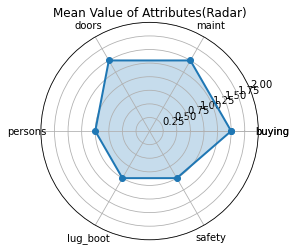

In [10]:
# the follow codes are adapted from: https://blog.csdn.net/zx1245773445/article/details/96992357

mean_data = data.mean()
max_data = data.max()
feature = np.array(['buying', 'maint', 'doors',
                   'persons', 'lug_boot', 'safety'])
mean_data = np.array(mean_data)
index = [6]
mean_data = np.delete(mean_data, index)

# Set the display position of each data point, expressed in degrees on the radar chart
angles = np.linspace(0, 2*np.pi, len(mean_data), endpoint=False)

# Concatenate the beginning and end of the data, so that the lines in the graph are closed
feature = np.concatenate((feature, [feature[0]]))
mean_data = np.concatenate((mean_data, [mean_data[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Plotting
fig = plt.figure()
# Set to polar format
ax = fig.add_subplot(111, polar=True)
# Draw a line chart
ax.plot(angles, mean_data, 'o-', linewidth=2)
ax.fill(angles, mean_data, alpha=0.25)

# Set the angle division scale on the icon, adding labels at each data point
ax.set_thetagrids(angles * 180/np.pi, feature)

# Set the range of the radar chart, add titles and gridlines
ax.set_ylim(0, 2)
plt.title('Mean Value of Attributes(Radar)')
ax.grid(True)

plt.show()


### 4. Correlation Test on the Dataset

To test whether there are positive or negative relationships among the attributes, we use the corr() method in pandas to check the correlation between each pair of attributes.

Since all the values of correlation are close to zero, we can know that there's no significant relationship between these attributes, which means all of them can be used in training a machine learning model for classification.


In [11]:
data_corr = data.loc[:, data.columns != 'class'].corr()
data_corr

,buying,maint,doors,persons,lug_boot,safety
buying,1.000000e+00,2.467162e-17,-6.167906e-18,9.008803e-18,-1.323168e-17,0.000000e+00
maint,2.467162e-17,1.000000e+00,-1.644775e-18,-9.121413e-17,-4.025809e-17,-6.080942e-17
doors,-6.167906e-18,-1.644775e-18,1.000000e+00,2.815251e-19,5.320824e-17,6.080942e-17
persons,9.008803e-18,-9.121413e-17,2.815251e-19,1.000000e+00,7.401487e-17,0.000000e+00
lug_boot,-1.323168e-17,-4.025809e-17,5.320824e-17,7.401487e-17,1.000000e+00,0.000000e+00
safety,0.000000e+00,-6.080942e-17,6.080942e-17,0.000000e+00,0.000000e+00,1.000000e+00


We also used the heatmap() function in seaborn package to visualize the correlation coefficient.

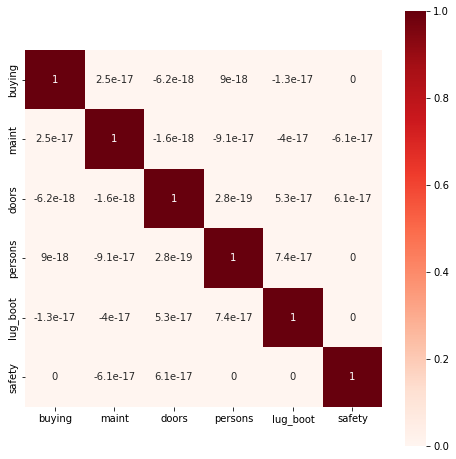

In [12]:
import seaborn as sns

plt.subplots(figsize=(8, 8))
sns.heatmap(data_corr, annot=True, vmax=1, square=True, cmap="Reds")
plt.show()


### 5. Train-test Split

Then we perform the train-test split whose results will be used in every machine learning methods in the project.


We first separate the target class from the rest of the attributes.


In [13]:
from sklearn.model_selection import train_test_split

# separate the target class from the rest of the attributes
xs, ys = np.split(data.values, [-1], axis=1)


Then we randomize the data and perform the train-test split (80% for training and 20% for testing).

<b>Since the dataset is imbalanced, in case there will be few sample of certain classes in the test/training set, we keep the proportion of each class in both the training set and the test set by setting the 'stratify' attribute as 'ys'.</b>


In [14]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs, ys, test_size=0.2, random_state=66, shuffle=True, stratify=ys)

# show the shape of training set and test set
print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)

# a function to show the proportion of each class


def show_proportion(dataset):
    num = pd.DataFrame(dataset).value_counts()
    for i in range(len(num)):
        print(class_dic[i], round(num[i]/dataset.shape[0], 3))


print('\nProportion of each class in the training set:')
show_proportion(ys_train)

print('\nProportion of each class in the test set:')
show_proportion(ys_test)


training set shape:	 (1382, 6)
test set shape:		 (346, 6)

Proportion of each class in the training set:
unacc 0.7
acc 0.222
vgood 0.038
good 0.04

Proportion of each class in the test set:
unacc 0.699
acc 0.223
vgood 0.038
good 0.04


Finally, we save the xs_train, xs_test, ys_train, ys_test as .NPY files so that they can be used in other jyputer notebooks.


In [15]:
np.save('data/xs_train.npy', xs_train)
np.save('data/xs_test.npy', xs_test)
np.save('data/ys_train.npy', ys_train)
np.save('data/ys_test.npy', ys_test)
